# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

#### Question1：What percentage of votes were cast in each film genre in the top 500 films? What percentage of votes were cast for horror films?
#### Question2:  How many votes were cast for horror films compared to the year? The growth rate?
#### Question3: What factors influence votes in horror movies?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1** （Get data on the top 1000 movies at www.imdb.com ）

Type: CSV

Method: Use BeautifulSoup to collect and extract data from HTML files

Dataset variables:

*   __*Movie Title:*__ Name of the movie
*   __*Movie Year:*__ Make Year of the movie
*   __*Genre:*__ Genre of the movie
*   __*Rating:*__ Rating of the movie
*   __*Director:*__ Name of the director
*   __*Votes:*__ Number of votes of the movie

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
import re


In [3]:
# IMDB 250 pages per page, so take the first 4 pages of data
urls = ['https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=1&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=251&ref_=adv_nxt']

In [4]:
# Define the field name based on the property
movie_name=[]
movie_year=[]
movie_genre=[]
movie_rating=[]
movie_votes=[]
movie_director=[]

In [23]:
# Encapsulate the result of BeautifulSoup
def htmlContent(url,head):
    response = requests.get(url,headers=head,verify=False)
    content = BeautifulSoup(response.content,'html.parser')
    return content

In [69]:
#Add head to avoid reptilian mechanisms
head = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.71 Safari/537.36", "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9","cookie": "ubid-main=132-4192576-6680413; session-id=136-4714236-1786163; session-id-time=2082787201l; ad-oo=0; csm-hit=tb:9GEW5PCN0MVBAWV8V62A+s-9GEW5PCN0MVBAWV8V62A|1700917598269&t:1700917598269&adb:adblk_no"}
# Obtain top 500 IMDB data
for url in urls:
    soup=htmlContent(url,head)
    movies = soup.findAll('div',attrs={'class':'sc-21df249b-4 jIogGj dli-parent'})
    for movie in movies:
        detail_url = 'https://www.imdb.com' + movie.find('a', class_='ipc-lockup-overlay ipc-focusable').get('href')
        response_detail_soup = htmlContent(detail_url,head)
        movie_detail_top=response_detail_soup.find('div',attrs={'class':'sc-e226b0e3-3 dwkouE'})
        name=movie_detail_top.find('span',attrs={'class':'sc-7f1a92f5-1 benbRT'}).text
        movie_name.append(name)
        year=movie_detail_top.find('ul').find_all('li')[0].text
        movie_year.append(year)
        rating=movie_detail_top.find('div',attrs={'class':'sc-bde20123-2 cdQqzc'}).span.text
        movie_rating.append(rating)
        categorys_list=response_detail_soup.find('div',attrs={'class':'ipc-chip-list__scroller'}).findAll('a')
        director=response_detail_soup.find('a',attrs={'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'}).text
        movie_director.append(director)
        votes=movie.find('div',attrs={'class':'sc-21df249b-0 jmcDPS'}).text.replace('Votes','').replace(',','')
        movie_votes.append(votes)
        categroys=''
        for categroy in categorys_list:
            categroys=categroy.text+'/'+categroys
        movie_genre.append(categroys)
        print(f'detail_url:{detail_url},name:{name},year:{year},rating:{rating},genre:{categroys},votes:{votes},director:{director}')
    

detail_url:https://www.imdb.com/title/tt0111161/?ref_=sr_i_1,name:The Shawshank Redemption,year:1994,rating:9.3,genre:Drama/,votes:2823006,director:Frank Darabont
detail_url:https://www.imdb.com/title/tt0068646/?ref_=sr_i_2,name:The Godfather,year:1972,rating:9.2,genre:Drama/Crime/,votes:1967702,director:Francis Ford Coppola
detail_url:https://www.imdb.com/title/tt0468569/?ref_=sr_i_3,name:The Dark Knight,year:2008,rating:9.0,genre:Drama/Crime/Action/,votes:2804534,director:Christopher Nolan
detail_url:https://www.imdb.com/title/tt0108052/?ref_=sr_i_4,name:Schindler's List,year:1993,rating:9.0,genre:History/Drama/Biography/,votes:1418899,director:Steven Spielberg
detail_url:https://www.imdb.com/title/tt0071562/?ref_=sr_i_5,name:The Godfather Part II,year:1974,rating:9.0,genre:Drama/Crime/,votes:1335658,director:Francis Ford Coppola
detail_url:https://www.imdb.com/title/tt0167260/?ref_=sr_i_6,name:The Lord of the Rings: The Return of the King,year:2003,rating:9.0,genre:Drama/Adventure/A

detail_url:https://www.imdb.com/title/tt0120586/?ref_=sr_i_50,name:American History X,year:1998,rating:8.5,genre:Drama/Crime/,votes:1166461,director:Tony Kaye
detail_url:https://www.imdb.com/title/tt1675434/?ref_=sr_i_51,name:The Intouchables,year:2011,rating:8.5,genre:Drama/Comedy/Biography/,votes:906828,director:Olivier Nakache
detail_url:https://www.imdb.com/title/tt0253474/?ref_=sr_i_52,name:The Pianist,year:2002,rating:8.5,genre:Music/Drama/Biography/,votes:887445,director:Roman Polanski
detail_url:https://www.imdb.com/title/tt0054215/?ref_=sr_i_53,name:Psycho,year:1960,rating:8.5,genre:Thriller/Mystery/Horror/,votes:705122,director:Alfred Hitchcock
detail_url:https://www.imdb.com/title/tt0034583/?ref_=sr_i_54,name:Casablanca,year:1942,rating:8.5,genre:War/Romance/Drama/,votes:595644,director:Michael Curtiz
detail_url:https://www.imdb.com/title/tt0064116/?ref_=sr_i_55,name:Once Upon a Time in the West,year:1968,rating:8.5,genre:Western/,votes:343730,director:Sergio Leone
detail_ur

detail_url:https://www.imdb.com/title/tt0062622/?ref_=sr_i_100,name:2001: A Space Odyssey,year:1968,rating:8.3,genre:Sci-Fi/Adventure/,votes:704122,director:Stanley Kubrick
detail_url:https://www.imdb.com/title/tt0112573/?ref_=sr_i_101,name:Braveheart,year:1995,rating:8.3,genre:History/Drama/Biography/,votes:1074733,director:Mel Gibson
detail_url:https://www.imdb.com/title/tt0066921/?ref_=sr_i_102,name:A Clockwork Orange,year:1971,rating:8.3,genre:Sci-Fi/Crime/,votes:865750,director:Stanley Kubrick
detail_url:https://www.imdb.com/title/tt0093058/?ref_=sr_i_103,name:Full Metal Jacket,year:1987,rating:8.3,genre:War/Drama/,votes:775575,director:Stanley Kubrick
detail_url:https://www.imdb.com/title/tt1049413/?ref_=sr_i_104,name:Up,year:2009,rating:8.3,genre:Comedy/Adventure/Animation/,votes:1099613,director:Pete Docter
detail_url:https://www.imdb.com/title/tt0087843/?ref_=sr_i_105,name:Once Upon a Time in America,year:1984,rating:8.3,genre:Drama/Crime/,votes:369908,director:Sergio Leone
de

detail_url:https://www.imdb.com/title/tt0120382/?ref_=sr_i_150,name:The Truman Show,year:1998,rating:8.2,genre:Drama/Comedy/,votes:1158870,director:Peter Weir
detail_url:https://www.imdb.com/title/tt0434409/?ref_=sr_i_151,name:V for Vendetta,year:2005,rating:8.2,genre:Sci-Fi/Drama/Action/,votes:1161947,director:James McTeigue
detail_url:https://www.imdb.com/title/tt0208092/?ref_=sr_i_152,name:Snatch,year:2000,rating:8.2,genre:Crime/Comedy/,votes:892505,director:Guy Ritchie
detail_url:https://www.imdb.com/title/tt6966692/?ref_=sr_i_153,name:Green Book,year:2018,rating:8.2,genre:Drama/Comedy/Biography/,votes:543140,director:Peter Farrelly
detail_url:https://www.imdb.com/title/tt0372784/?ref_=sr_i_154,name:Batman Begins,year:2005,rating:8.2,genre:Drama/Crime/Action/,votes:1545744,director:Christopher Nolan
detail_url:https://www.imdb.com/title/tt0347149/?ref_=sr_i_155,name:Howl's Moving Castle,year:2004,rating:8.2,genre:Family/Adventure/Animation/,votes:430317,director:Hayao Miyazaki
deta

detail_url:https://www.imdb.com/title/tt0065234/?ref_=sr_i_199,name:Z,year:1969,rating:8.2,genre:Thriller/Drama/Crime/,votes:30730,director:Costa-Gavras
detail_url:https://www.imdb.com/title/tt0015324/?ref_=sr_i_200,name:Sherlock Jr.,year:1924,rating:8.2,genre:Romance/Comedy/Action/,votes:54925,director:Buster Keaton
detail_url:https://www.imdb.com/title/tt8291224/?ref_=sr_i_201,name:Uri: The Surgical Strike,year:2019,rating:8.2,genre:History/Drama/Action/,votes:69858,director:Aditya Dhar
detail_url:https://www.imdb.com/title/tt0071411/?ref_=sr_i_202,name:Dersu Uzala,year:1975,rating:8.2,genre:Drama/Biography/Adventure/,votes:32727,director:Akira Kurosawa
detail_url:https://www.imdb.com/title/tt0045274/?ref_=sr_i_203,name:Umberto D.,year:1952,rating:8.2,genre:Drama/,votes:27562,director:Vittorio De Sica
detail_url:https://www.imdb.com/title/tt7392212/?ref_=sr_i_204,name:Rangasthalam 1985,year:2018,rating:8.2,genre:Drama/Action/,votes:26959,director:Sukumar
detail_url:https://www.imdb.c

detail_url:https://www.imdb.com/title/tt1979320/?ref_=sr_i_248,name:Rush,year:2013,rating:8.1,genre:Drama/Biography/Action/,votes:503406,director:Ron Howard
detail_url:https://www.imdb.com/title/tt1291584/?ref_=sr_i_249,name:Warrior,year:2011,rating:8.1,genre:Sport/Drama/Action/,votes:490387,director:Gavin O'Connor
detail_url:https://www.imdb.com/title/tt0081398/?ref_=sr_i_250,name:Raging Bull,year:1980,rating:8.1,genre:Sport/Drama/Biography/,votes:372361,director:Martin Scorsese
detail_url:https://www.imdb.com/title/tt0111161/?ref_=sr_i_1,name:The Shawshank Redemption,year:1994,rating:9.3,genre:Drama/,votes:2823006,director:Frank Darabont
detail_url:https://www.imdb.com/title/tt0068646/?ref_=sr_i_2,name:The Godfather,year:1972,rating:9.2,genre:Drama/Crime/,votes:1967702,director:Francis Ford Coppola
detail_url:https://www.imdb.com/title/tt0468569/?ref_=sr_i_3,name:The Dark Knight,year:2008,rating:9.0,genre:Drama/Crime/Action/,votes:2804534,director:Christopher Nolan
detail_url:https:/

detail_url:https://www.imdb.com/title/tt0110413/?ref_=sr_i_47,name:Léon: The Professional,year:1994,rating:8.5,genre:Drama/Crime/Action/,votes:1218787,director:Luc Besson
detail_url:https://www.imdb.com/title/tt0114814/?ref_=sr_i_48,name:The Usual Suspects,year:1995,rating:8.5,genre:Mystery/Drama/Crime/,votes:1126264,director:Bryan Singer
detail_url:https://www.imdb.com/title/tt0110357/?ref_=sr_i_49,name:The Lion King,year:1994,rating:8.5,genre:Drama/Adventure/Animation/,votes:1115713,director:Roger Allers
detail_url:https://www.imdb.com/title/tt0120586/?ref_=sr_i_50,name:American History X,year:1998,rating:8.5,genre:Drama/Crime/,votes:1166461,director:Tony Kaye
detail_url:https://www.imdb.com/title/tt1675434/?ref_=sr_i_51,name:The Intouchables,year:2011,rating:8.5,genre:Drama/Comedy/Biography/,votes:906828,director:Olivier Nakache
detail_url:https://www.imdb.com/title/tt0253474/?ref_=sr_i_52,name:The Pianist,year:2002,rating:8.5,genre:Music/Drama/Biography/,votes:887445,director:Roman

detail_url:https://www.imdb.com/title/tt0180093/?ref_=sr_i_97,name:Requiem for a Dream,year:2000,rating:8.3,genre:Drama/,votes:881463,director:Darren Aronofsky
detail_url:https://www.imdb.com/title/tt0338013/?ref_=sr_i_98,name:Eternal Sunshine of the Spotless Mind,year:2004,rating:8.3,genre:Sci-Fi/Romance/Drama/,votes:1054260,director:Michel Gondry
detail_url:https://www.imdb.com/title/tt0119217/?ref_=sr_i_99,name:Good Will Hunting,year:1997,rating:8.3,genre:Romance/Drama/,votes:1031758,director:Gus Van Sant
detail_url:https://www.imdb.com/title/tt0062622/?ref_=sr_i_100,name:2001: A Space Odyssey,year:1968,rating:8.3,genre:Sci-Fi/Adventure/,votes:704122,director:Stanley Kubrick
detail_url:https://www.imdb.com/title/tt0112573/?ref_=sr_i_101,name:Braveheart,year:1995,rating:8.3,genre:History/Drama/Biography/,votes:1074733,director:Mel Gibson
detail_url:https://www.imdb.com/title/tt0066921/?ref_=sr_i_102,name:A Clockwork Orange,year:1971,rating:8.3,genre:Sci-Fi/Crime/,votes:865750,directo

detail_url:https://www.imdb.com/title/tt0469494/?ref_=sr_i_147,name:There Will Be Blood,year:2007,rating:8.2,genre:Drama/,votes:625878,director:Paul Thomas Anderson
detail_url:https://www.imdb.com/title/tt0084787/?ref_=sr_i_148,name:The Thing,year:1982,rating:8.2,genre:Sci-Fi/Mystery/Horror/,votes:454405,director:John Carpenter
detail_url:https://www.imdb.com/title/tt0266697/?ref_=sr_i_149,name:Kill Bill: Vol. 1,year:2003,rating:8.2,genre:Thriller/Crime/Action/,votes:1167251,director:Quentin Tarantino
detail_url:https://www.imdb.com/title/tt0120382/?ref_=sr_i_150,name:The Truman Show,year:1998,rating:8.2,genre:Drama/Comedy/,votes:1158870,director:Peter Weir
detail_url:https://www.imdb.com/title/tt0434409/?ref_=sr_i_151,name:V for Vendetta,year:2005,rating:8.2,genre:Sci-Fi/Drama/Action/,votes:1161947,director:James McTeigue
detail_url:https://www.imdb.com/title/tt0208092/?ref_=sr_i_152,name:Snatch,year:2000,rating:8.2,genre:Crime/Comedy/,votes:892505,director:Guy Ritchie
detail_url:http

detail_url:https://www.imdb.com/title/tt0476735/?ref_=sr_i_196,name:My Father and My Son,year:2005,rating:8.2,genre:Family/Drama/,votes:90518,director:Çagan Irmak
detail_url:https://www.imdb.com/title/tt15327088/?ref_=sr_i_197,name:Kantara,year:2022,rating:8.2,genre:Drama/Adventure/Action/,votes:99297,director:Rishab Shetty
detail_url:https://www.imdb.com/title/tt7838252/?ref_=sr_i_198,name:K.G.F: Chapter 1,year:2018,rating:8.2,genre:Drama/Crime/Action/,votes:95056,director:Prashanth Neel
detail_url:https://www.imdb.com/title/tt0065234/?ref_=sr_i_199,name:Z,year:1969,rating:8.2,genre:Thriller/Drama/Crime/,votes:30730,director:Costa-Gavras
detail_url:https://www.imdb.com/title/tt0015324/?ref_=sr_i_200,name:Sherlock Jr.,year:1924,rating:8.2,genre:Romance/Comedy/Action/,votes:54925,director:Buster Keaton
detail_url:https://www.imdb.com/title/tt8291224/?ref_=sr_i_201,name:Uri: The Surgical Strike,year:2019,rating:8.2,genre:History/Drama/Action/,votes:69858,director:Aditya Dhar
detail_url:h

detail_url:https://www.imdb.com/title/tt1895587/?ref_=sr_i_246,name:Spotlight,year:2015,rating:8.1,genre:Drama/Crime/Biography/,votes:492968,director:Tom McCarthy
detail_url:https://www.imdb.com/title/tt0892769/?ref_=sr_i_247,name:How to Train Your Dragon,year:2010,rating:8.1,genre:Adventure/Action/Animation/,votes:781912,director:Dean DeBlois
detail_url:https://www.imdb.com/title/tt1979320/?ref_=sr_i_248,name:Rush,year:2013,rating:8.1,genre:Drama/Biography/Action/,votes:503406,director:Ron Howard
detail_url:https://www.imdb.com/title/tt1291584/?ref_=sr_i_249,name:Warrior,year:2011,rating:8.1,genre:Sport/Drama/Action/,votes:490387,director:Gavin O'Connor
detail_url:https://www.imdb.com/title/tt0081398/?ref_=sr_i_250,name:Raging Bull,year:1980,rating:8.1,genre:Sport/Drama/Biography/,votes:372361,director:Martin Scorsese


In [24]:
# Define Define df
df_top_500 = pd.DataFrame({'name':movie_name,
                         'year':movie_year,
                         'genre': movie_genre,
                         'rating':movie_rating,
                         'director':movie_director,
                         'votes':movie_votes
                        })

In [28]:
df_top_500.shape

(500, 6)

In [29]:
df_top_500.head()

,name,year,genre,rating,director,votes
0,The Shawshank Redemption,1994,Drama/,9.3,Frank Darabont,2823006
1,The Godfather,1972,Drama/Crime/,9.2,Francis Ford Coppola,1967702
2,The Dark Knight,2008,Drama/Crime/Action/,9.0,Christopher Nolan,2804534
3,Schindler's List,1993,History/Drama/Biography/,9.0,Steven Spielberg,1418899
4,The Godfather Part II,1974,Drama/Crime/,9.0,Francis Ford Coppola,1335658


In [9]:
# For the convenience of storing a local store
# df_top_500.to_csv('Imdb_top_500.csv', encoding='utf-8', index=False)

In [27]:
df_top_500=pd.read_csv('Imdb_top_500.csv')

#### Dataset 2 (Horror Movie Dataset from kaggle)

Type: CSV

Method: Download manually from Kaggle <br>(https://www.kaggle.com/datasets/shreyanshverma27/imdb-horror-chilling-movie-dataset)

Dataset variables:

*   __*Movie Title:*__ Name of the movie
*   __*Movie Year:*__ Make Year of the movie
*   __*Genre:*__ Genre of the movie
*   __*Rating:*__ Rating of the movie
*   __*Director:*__ Name of the director
*   __*Votes:*__ Number of votes of the movie

In [76]:
# Unified bytecode
# df_horror = pd.read_csv('Horror_Movies_download.csv', encoding='Latin-1')
# df_horror.to_csv('output.csv', encoding='utf-8', index=False)

In [12]:
# Load the second type of data
df_horror = pd.read_csv('Horror_Movies_download_utf-8.csv')
df_horror

,name,year,genre,rating,director,votes
0,Alien,1979,Horror/Sci-Fi,8.5,Ridley Scott,905275
1,Psycho,1960,Horror/Mystery/Thriller,8.5,Alfred Hitchcock,689068
2,The Shining,1980,Drama/Horror,8.4,Stanley Kubrick,1051582
3,The Thing,1982,Horror/Mystery/Sci-Fi,8.2,John Carpenter,439793
4,Tumbbad,2018,Drama/Fantasy/Horror,8.2,Rahi Anil Barve,"53,297"
...,...,...,...,...,...,...
831,Troll 2,1990,Comedy/Fantasy/Horror,2.9,Claudio Fragasso,"33,908"
832,Laxmii,2020,Action/Comedy/Horror,2.5,Raghava Lawrence,"58,053"
833,Alone in the Dark,2005,Action/Horror/Sci-Fi,2.4,Uwe Boll,"46,403"
834,House of the Dead,2003,Action/Adventure/Horror,2.1,Uwe Boll,"38,041"


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [13]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

#### Inspecting the dataframe visually

In [17]:
#FILL IN - Inspecting the dataframe visually
df_top_500.head(10)

,name,year,genre,rating,director,votes
0,The Shawshank Redemption,1994,Drama/,9.3,Frank Darabont,2823006
1,The Godfather,1972,Drama/Crime/,9.2,Francis Ford Coppola,1967702
2,The Dark Knight,2008,Drama/Crime/Action/,9.0,Christopher Nolan,2804534
3,Schindler's List,1993,History/Drama/Biography/,9.0,Steven Spielberg,1418899
4,The Godfather Part II,1974,Drama/Crime/,9.0,Francis Ford Coppola,1335658
5,The Lord of the Rings: The Return of the King,2003,Drama/Adventure/Action/,9.0,Peter Jackson,1933086
6,12 Angry Men,1957,Drama/Crime/,9.0,Sidney Lumet,841634
7,Pulp Fiction,1994,Drama/Crime/,8.9,Quentin Tarantino,2164808
8,Fight Club,1999,Drama/,8.8,David Fincher,2258438
9,Inception,2010,Sci-Fi/Adventure/Action/,8.8,Christopher Nolan,2489331


In [20]:
# Check for empty values and data format problems
df_top_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      500 non-null    object 
 1   year      500 non-null    int64  
 2   genre     500 non-null    object 
 3   rating    500 non-null    float64
 4   director  500 non-null    object 
 5   votes     500 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 23.6+ KB


- After checking, it is found that there is no null value and the field type is correct

In [19]:
# Check whether duplicate data exists
df_top_500.duplicated().sum()

250

- Some duplicate data is queried to avoid affecting statistics and perform deduplication later

In [21]:
# data drop duplicate
df_top_500.reset_index(drop=True, inplace=True)
df_top_500_clean = df_top_500.drop_duplicates()

In [22]:
# check duplicate
df_top_500_clean.duplicated().sum()

0

- conclusion1：df_top_500 Data quality integrity ,However duplicate data exists, Duplicate data has been cleared

### Quality Issue 2:

#### Inspecting the dataframe visually

In [84]:
df_horror.head(10)

,name,year,genre,rating,director,votes
0,Alien,1979,Horror/Sci-Fi,8.5,Ridley Scott,905275
1,Psycho,1960,Horror/Mystery/Thriller,8.5,Alfred Hitchcock,689068
2,The Shining,1980,Drama/Horror,8.4,Stanley Kubrick,1051582
3,The Thing,1982,Horror/Mystery/Sci-Fi,8.2,John Carpenter,439793
4,Tumbbad,2018,Drama/Fantasy/Horror,8.2,Rahi Anil Barve,"53,297"
5,The Exorcist,1973,Horror,8.1,William Friedkin,422330
6,Diabolique,1955,Crime/Drama/Horror,8.1,Henri-Georges Clouzot,"67,456"
7,Rosemary's Baby,1968,Drama/Horror,8.0,Roman Polanski,223968
8,What Ever Happened to Baby Jane?,1962,Drama/Horror/Thriller,8.0,Robert Aldrich,"58,904"
9,The Cabinet of Dr. Caligari,1920,Horror/Mystery/Thriller,8.0,Robert Wiene,"66,749"


In [85]:
df_horror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      836 non-null    object 
 1   year      836 non-null    int64  
 2   genre     836 non-null    object 
 3   rating    836 non-null    float64
 4   director  836 non-null    object 
 5   votes     836 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 39.3+ KB


- There are data format problems with votes， it should be int64

In [30]:
# check duplicated
df_horror.duplicated().sum()

0

- Check that there is no empty data and no duplicate data

#### conclusion2：data integrity

### Tidiness Issue 1: Dataset 1 

In [87]:
df_top_500_clean.head()

,name,year,genre,rating,director,votes
0,The Shawshank Redemption,1994,Drama/,9.3,Frank Darabont,2823006
1,The Godfather,1972,Drama/Crime/,9.2,Francis Ford Coppola,1967702
2,The Dark Knight,2008,Drama/Crime/Action/,9.0,Christopher Nolan,2804534
3,Schindler's List,1993,History/Drama/Biography/,9.0,Steven Spielberg,1418899
4,The Godfather Part II,1974,Drama/Crime/,9.0,Francis Ford Coppola,1335658


- genre has the problem of multiple values, which needs to be processed into independent fields to facilitate later analysis

### Tidiness Issue 2:  Dataset 2 

In [89]:
df_horror.head()

,name,year,genre,rating,director,votes
0,Alien,1979,Horror/Sci-Fi,8.5,Ridley Scott,905275
1,Psycho,1960,Horror/Mystery/Thriller,8.5,Alfred Hitchcock,689068
2,The Shining,1980,Drama/Horror,8.4,Stanley Kubrick,1051582
3,The Thing,1982,Horror/Mystery/Sci-Fi,8.2,John Carpenter,439793
4,Tumbbad,2018,Drama/Fantasy/Horror,8.2,Rahi Anil Barve,"53,297"


- genre has the problem of multiple values, which needs to be processed into independent fields to facilitate later analysis

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [44]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
df1 = df_top_500_clean.copy()
df2 = df_horror.copy()

### **Quality Issue 1: Dataset1**

- year data format should be number

In [45]:
# year
df1['year'] = df1['year'].astype(int)

- rating data format should be float

In [46]:
#rating
df1.rating = df1.rating.astype(float)

votes data format should be number

In [47]:
#votes
df1.votes = df1.votes.astype(int)

In [48]:
# FILL IN - Validate the cleaning was successful
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      250 non-null    object 
 1   year      250 non-null    int64  
 2   genre     250 non-null    object 
 3   rating    250 non-null    float64
 4   director  250 non-null    object 
 5   votes     250 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.7+ KB


- Field type repaired to expected type, no empty data

### **Quality Issue 2: Dataset2**

In [49]:
df2.head()

,name,year,genre,rating,director,votes
0,Alien,1979,Horror/Sci-Fi,8.5,Ridley Scott,905275
1,Psycho,1960,Horror/Mystery/Thriller,8.5,Alfred Hitchcock,689068
2,The Shining,1980,Drama/Horror,8.4,Stanley Kubrick,1051582
3,The Thing,1982,Horror/Mystery/Sci-Fi,8.2,John Carpenter,439793
4,Tumbbad,2018,Drama/Fantasy/Horror,8.2,Rahi Anil Barve,"53,297"


- found vote data exists symbol ","
- fix validity issue

In [50]:
# votes drop ","
df2.votes = df2.votes.apply(lambda x: x.replace(',',''))
df2.votes = df2.votes.astype(int)

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      836 non-null    object 
 1   year      836 non-null    int64  
 2   genre     836 non-null    object 
 3   rating    836 non-null    float64
 4   director  836 non-null    object 
 5   votes     836 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 39.3+ KB


In [52]:
df2.isna()

,name,year,genre,rating,director,votes
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
831,False,False,False,False,False,False
832,False,False,False,False,False,False
833,False,False,False,False,False,False
834,False,False,False,False,False,False


#### conclusion: Neither df_top_500_cleam nor df_horror has NAN, and the data format is accurate

### **Tidiness Issue 1: genre**

### Fixing Data
-  It is found that there are up to three types of films,Classify and split movies for easy statistics like [genre1, genre2, genre3]

In [57]:
# Define the split Genre method
def splitGenre(df):
    df['genre1'] = df['genre'].apply(lambda x:x.split('/')[0])
    df['genre2'] = df['genre'].apply(lambda x:x.split('/')[1] if len(x.split('/'))>2 else np.nan)
    df['genre3'] = df['genre'].apply(lambda x:x.split('/')[2] if len(x.split('/'))>3 else np.nan)

In [58]:
# Decompose the genre field value of df1
splitGenre(df1)

In [59]:
genre1=df1.genre1.unique().astype('str')

In [60]:
genre2=df1.genre2.unique().astype('str')

In [61]:
genre3=df1.genre3.unique().astype('str')

In [62]:
# Total genre 
genre_all=np.concatenate([genre1,genre2,genre3])
print(np.unique(genre_all))

['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime' 'Drama'
 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror' 'Music' 'Musical'
 'Mystery' 'Romance' 'Sci-Fi' 'Sport' 'Thriller' 'War' 'Western' 'nan']


- There are 21 genre

In [63]:
df1.head()

,name,year,genre,rating,director,votes,genre1,genre2,genre3
0,The Shawshank Redemption,1994,Drama/,9.3,Frank Darabont,2823006,Drama,NaN,NaN
1,The Godfather,1972,Drama/Crime/,9.2,Francis Ford Coppola,1967702,Drama,Crime,NaN
2,The Dark Knight,2008,Drama/Crime/Action/,9.0,Christopher Nolan,2804534,Drama,Crime,Action
3,Schindler's List,1993,History/Drama/Biography/,9.0,Steven Spielberg,1418899,History,Drama,Biography
4,The Godfather Part II,1974,Drama/Crime/,9.0,Francis Ford Coppola,1335658,Drama,Crime,NaN


### **Tidiness Issue 2: df2 Genre Tidiness Issue**

In [64]:
## Use defined methods and split genre
splitGenre(df2)

In [65]:
df2.head()

,name,year,genre,rating,director,votes,genre1,genre2,genre3
0,Alien,1979,Horror/Sci-Fi,8.5,Ridley Scott,905275,Horror,NaN,NaN
1,Psycho,1960,Horror/Mystery/Thriller,8.5,Alfred Hitchcock,689068,Horror,Mystery,NaN
2,The Shining,1980,Drama/Horror,8.4,Stanley Kubrick,1051582,Drama,NaN,NaN
3,The Thing,1982,Horror/Mystery/Sci-Fi,8.2,John Carpenter,439793,Horror,Mystery,NaN
4,Tumbbad,2018,Drama/Fantasy/Horror,8.2,Rahi Anil Barve,53297,Drama,Fantasy,NaN


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

- The genre field of df1 is no longer needed and is now removed

In [66]:
df1.drop('genre',axis=1,inplace=True)
df1.head()

,name,year,rating,director,votes,genre1,genre2,genre3
0,The Shawshank Redemption,1994,9.3,Frank Darabont,2823006,Drama,NaN,NaN
1,The Godfather,1972,9.2,Francis Ford Coppola,1967702,Drama,Crime,NaN
2,The Dark Knight,2008,9.0,Christopher Nolan,2804534,Drama,Crime,Action
3,Schindler's List,1993,9.0,Steven Spielberg,1418899,History,Drama,Biography
4,The Godfather Part II,1974,9.0,Francis Ford Coppola,1335658,Drama,Crime,NaN


- The genre field of df2 is no longer needed and is now removed

In [67]:
df2.drop('genre',axis=1,inplace=True)
df2.head()

,name,year,rating,director,votes,genre1,genre2,genre3
0,Alien,1979,8.5,Ridley Scott,905275,Horror,NaN,NaN
1,Psycho,1960,8.5,Alfred Hitchcock,689068,Horror,Mystery,NaN
2,The Shining,1980,8.4,Stanley Kubrick,1051582,Drama,NaN,NaN
3,The Thing,1982,8.2,John Carpenter,439793,Horror,Mystery,NaN
4,Tumbbad,2018,8.2,Rahi Anil Barve,53297,Drama,Fantasy,NaN


In [70]:
# combine datasets
top500_horror=df1.merge(df2,how='inner',left_on='name', right_on='name')
df_left=df1.merge(df2,how='left',left_on='name', right_on='name')

In [71]:
top500_horror.shape

(7, 15)

In [72]:
# check duplicated
top500_horror.name.duplicated().sum()

1

- found duplicated 1 row

In [73]:
top500_horror.head()

,name,year_x,rating_x,director_x,votes_x,genre1_x,genre2_x,genre3_x,year_y,rating_y,director_y,votes_y,genre1_y,genre2_y,genre3_y
0,Alien,1979,8.5,Ridley Scott,928296,Sci-Fi,Horror,NaN,1979,8.5,Ridley Scott,905275,Horror,NaN,NaN
1,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror,1960,8.5,Alfred Hitchcock,689068,Horror,Mystery,NaN
2,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror,1998,4.6,Gus Van Sant,49550,Horror,Mystery,NaN
3,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN,1980,8.4,Stanley Kubrick,1051582,Drama,NaN,NaN
4,The Thing,1982,8.2,John Carpenter,454405,Sci-Fi,Mystery,Horror,1982,8.2,John Carpenter,439793,Horror,Mystery,NaN


- found same name but different year data, to avoid statistical errors, now deleted

In [74]:
# delete same name but different year
top500_horror = top500_horror[~(top500_horror['year_x']!=top500_horror['year_y'])]

In [75]:
top500_horror.shape

(6, 15)

In [76]:
top500_horror.head(6)

,name,year_x,rating_x,director_x,votes_x,genre1_x,genre2_x,genre3_x,year_y,rating_y,director_y,votes_y,genre1_y,genre2_y,genre3_y
0,Alien,1979,8.5,Ridley Scott,928296,Sci-Fi,Horror,NaN,1979,8.5,Ridley Scott,905275,Horror,NaN,NaN
1,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror,1960,8.5,Alfred Hitchcock,689068,Horror,Mystery,NaN
3,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN,1980,8.4,Stanley Kubrick,1051582,Drama,NaN,NaN
4,The Thing,1982,8.2,John Carpenter,454405,Sci-Fi,Mystery,Horror,1982,8.2,John Carpenter,439793,Horror,Mystery,NaN
5,Tumbbad,2018,8.2,Rahi Anil Barve,56402,Horror,Fantasy,Drama,2018,8.2,Rahi Anil Barve,53297,Drama,Fantasy,NaN
6,The Exorcist,1973,8.1,William Friedkin,445089,Horror,NaN,NaN,1973,8.1,William Friedkin,422330,Horror,NaN,NaN


In [198]:
top500_horror.head(6)

,name,year_x,rating_x,director_x,votes_x,genre1_x,genre2_x,genre3_x
0,Alien,1979,8.5,Ridley Scott,928296,Sci-Fi,Horror,NaN
1,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror
3,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN
4,The Thing,1982,8.2,John Carpenter,454405,Sci-Fi,Mystery,Horror
5,Tumbbad,2018,8.2,Rahi Anil Barve,56402,Horror,Fantasy,Drama
6,The Exorcist,1973,8.1,William Friedkin,445089,Horror,NaN,NaN


- Clear unnecessary fields 'year_y','rating_y','director_y','votes_y','genre1_y','genre2_y','genre3_y'

In [77]:
#Use the IMDB data
top500_horror=top500_horror.drop(['year_y','rating_y','director_y','votes_y','genre1_y','genre2_y','genre3_y'],axis=1)

- rename field name( 'year_x': 'year', 'rating_x': 'rating','director_x':'director','votes_x':'votes','genre1_x':'genre1','genre2_x':'genre2','genre3_x':'genre3)

In [78]:
top500_horror = top500_horror.rename(columns={'year_x': 'year', 'rating_x': 'rating','director_x':'director','votes_x':'votes','genre1_x':'genre1','genre2_x':'genre2','genre3_x':'genre3'})


In [79]:
top500_horror.head()

,name,year,rating,director,votes,genre1,genre2,genre3
0,Alien,1979,8.5,Ridley Scott,928296,Sci-Fi,Horror,NaN
1,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror
3,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN
4,The Thing,1982,8.2,John Carpenter,454405,Sci-Fi,Mystery,Horror
5,Tumbbad,2018,8.2,Rahi Anil Barve,56402,Horror,Fantasy,Drama


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [80]:
# save the combined top500_horror
top500_horror.to_csv('top500_horror.csv')
df = pd.read_csv('top500_horror.csv',index_col=0)
df.head()

,name,year,rating,director,votes,genre1,genre2,genre3
0,Alien,1979,8.5,Ridley Scott,928296,Sci-Fi,Horror,NaN
1,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror
3,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN
4,The Thing,1982,8.2,John Carpenter,454405,Sci-Fi,Mystery,Horror
5,Tumbbad,2018,8.2,Rahi Anil Barve,56402,Horror,Fantasy,Drama


## 5. Answer the research question

### **5.1:** Define and answer the research question 

### Question：
- What percentage of horror films are in the top 500 movies? How many votes are in the audience for horror movies?
- Which director has the most votes? Did he make horror movies that made it to the top 500?
- What is the year-over-year trend in the number of horror movies in the top 500 films?

*Answer to research question:* FILL IN

#### I'll complete the analysis with df_top_500_genre and top500_horror data

In [81]:
df_top_500_genre=df1.copy()

In [82]:
# Film genre filter
def genreFilter(df,genre):
    df_genre = df[(df['genre1']==genre)|(df['genre2']==genre)|(df['genre3']==genre)]
    return df_genre

In [83]:
# Find out about the Horror movies in the top 500 movies
genreFilter(df_top_500_genre,'Horror').head()

,name,year,rating,director,votes,genre1,genre2,genre3
43,Alien,1979,8.5,Ridley Scott,928296,Sci-Fi,Horror,NaN
52,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror
66,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN
147,The Thing,1982,8.2,John Carpenter,454405,Sci-Fi,Mystery,Horror
181,Tumbbad,2018,8.2,Rahi Anil Barve,56402,Horror,Fantasy,Drama


In [84]:
Rate={}
Vote={}

for x in genre_all:
    Rate[x] = genreFilter(df_top_500_genre,x)['rating'].mean()
    Vote[x] = genreFilter(df_top_500_genre,x)['votes'].mean()

Rate_df = pd.DataFrame.from_dict(Rate,orient='index',columns=['Rate']).transpose()
Vote_df = pd.DataFrame.from_dict(Vote,orient='index',columns=['Votes']).transpose()

In [85]:
Rate_df2 = Rate_df.transpose().reset_index()
Vote_df2 = Vote_df.transpose().reset_index()

In [86]:
df_statistics = Rate_df2.merge(Vote_df2, left_on='index', right_on='index')
df_statistics

,index,Rate,Votes
0,Drama,8.354190,6.099535e+05
1,History,8.320000,5.158857e+05
2,Sci-Fi,8.365000,1.111940e+06
3,Romance,8.331818,4.347849e+05
4,Western,8.400000,6.031320e+05
5,Mystery,8.326471,5.279951e+05
6,Adventure,8.349091,8.707604e+05
7,Fantasy,8.330769,8.247693e+05
8,Thriller,8.293939,6.452010e+05
9,War,8.314286,4.595856e+05


In [88]:
# Saves Votes data grouped by genre
df_statistics.to_csv('df_statistics.csv')

### Question1:What percentage of horror films are in the top 500 movies? What is the number of entries for a horror movie?

In [89]:
# TThe percentage of Horror movies Top 500
per_horror = genreFilter(df_top_500_genre,'Horror').shape[0]/df_top_500_genre.shape[0]*100
per_horror

2.4

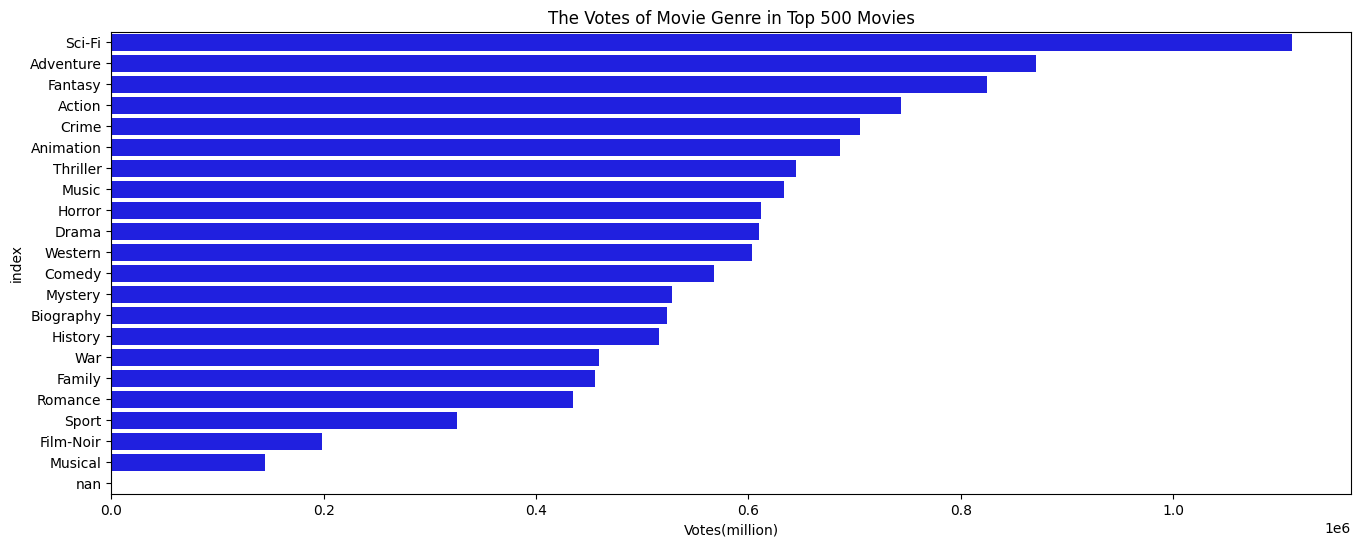

In [90]:
plt.figure(figsize=(16,6))
ax = sns.barplot(df_statistics.sort_values('Votes',ascending=False),x='Votes',y='index', orient='h', color='blue')
ax.set_title('The Votes of Movie Genre in Top 500 Movies')
ax.set_xlabel('Votes(million)');

### Answer1:
- percentage of horror films are in the top 500 movies is **2.4%**
- Total 500 Votes is **12199487** , the votes of horror is **611965** , the votes percentage of horror is **0.05%**.

### Question2:Which director has the most votes? Did he make horror movies that made it to the top 500?

In [93]:
# Check out the top 500 Horror movies
df_director_Horror = genreFilter(df_top_500_genre,'Horror')
df_director_Horror.head()

,name,year,rating,director,votes,genre1,genre2,genre3
43,Alien,1979,8.5,Ridley Scott,928296,Sci-Fi,Horror,NaN
52,Psycho,1960,8.5,Alfred Hitchcock,705122,Thriller,Mystery,Horror
66,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN
147,The Thing,1982,8.2,John Carpenter,454405,Sci-Fi,Mystery,Horror
181,Tumbbad,2018,8.2,Rahi Anil Barve,56402,Horror,Fantasy,Drama


In [94]:
# votes are counted according to director aggregation from director_votes_Horror
director_votes_Horror = genreFilter(df_top_500_genre,'Horror').groupby('director')['votes'].sum().sort_values(ascending=False)
director_votes_Horror

director
Stanley Kubrick     1082477
Ridley Scott         928296
Alfred Hitchcock     705122
John Carpenter       454405
William Friedkin     445089
Rahi Anil Barve       56402
Name: votes, dtype: int64

In [95]:
# votes are counted according to director aggregation from director_votes
director_votes = df_top_500_genre.groupby('director')['votes'].sum().sort_values(ascending=False)
director_votes

director
Christopher Nolan    13866767
Quentin Tarantino     7590820
Steven Spielberg      7447076
Martin Scorsese       7378351
Peter Jackson         5636153
                       ...   
Satyajit Ray            36900
C. Prem Kumar           34997
Vetrimaaran             32501
Costa-Gavras            30730
Sukumar                 26959
Name: votes, Length: 163, dtype: int64

-  **Christopher Nolan** is the director has the most votes in top 500 movies.**Stanley Kubrick** is the director has the most votes in top 500 Horror movies.

In [96]:
df_director_Horror[df_director_Horror.director=='Christopher Nolan']

,name,year,rating,director,votes,genre1,genre2,genre3


In [97]:
df_director_Horror[df_director_Horror.director=='Stanley Kubrick']

,name,year,rating,director,votes,genre1,genre2,genre3
66,The Shining,1980,8.4,Stanley Kubrick,1082477,Horror,Drama,NaN


### Answer2:
- **Christopher Nolan** is the director has the most votes in top 500 movies, but he didn't make a horror movie and made it to the top 500. **Stanley Kubrick** is the director has the most votes in top 500 Horror movies and he has made horror movies that are in the top 500.

### Question3： What is the year-over-year trend in the number of horror movies in the top 500 films?

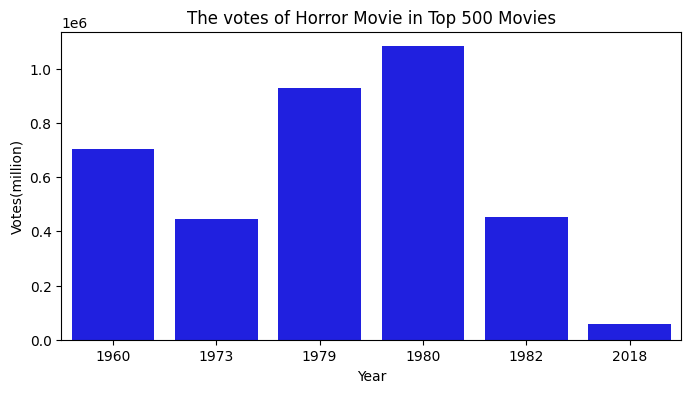

In [98]:
plt.figure(figsize=(8,4))
ax = sns.barplot(df_director_Horror.groupby('year').sum().reset_index(), x='year',y='votes',orient='v', color='blue')
ax.set_title('The votes of Horror Movie in Top 500 Movies')
ax.set_xlabel('Year');
ax.set_ylabel('Votes(million)');

### Answer3: 
- Among the top 500 movies over the years, the number of votes for horror films is mostly below **1 million**. The only exception was in **1980**, when **Stanley Kubrick's** film The Shining reached **1082477** votes.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN
- I will make a statistical chart of the relationship between the gender, age and genre of movie of the viewer, so that film investors can have a reference to shoot excellent movies

In [99]:
!python -m nbconvert --to html Data_Wrangling_Project_Starter.ipynb

[NbConvertApp] Converting notebook Data_Wrangling_Project_Starter.ipynb to html
[NbConvertApp] Writing 916771 bytes to Data_Wrangling_Project_Starter.html
